# Visualization of cross validation results
Note: Results shown in this notebook are based on a very short period. The metric values are not statistically reliable.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_cv = '../test_cases/cali2017/outputs/regression/LWLRstatic_stn_CV_regression_20170201-20170215.nc'
file_grid = '../test_cases/cali2017/outputs/regression/LWLRstatic_grid_regression_20170201-20170215.nc'
file_stn = '../test_cases/cali2017/outputs/stn_info/all_station_data.nc'
file_domain = '../test_cases/cali2017/inputs/CALI.gridinfo.0625_v3.nc'

ds_cv = xr.load_dataset(file_cv)
ds_grid = xr.load_dataset(file_grid)
ds_stn = xr.open_dataset(file_stn)
ds_domain = xr.load_dataset(file_domain)

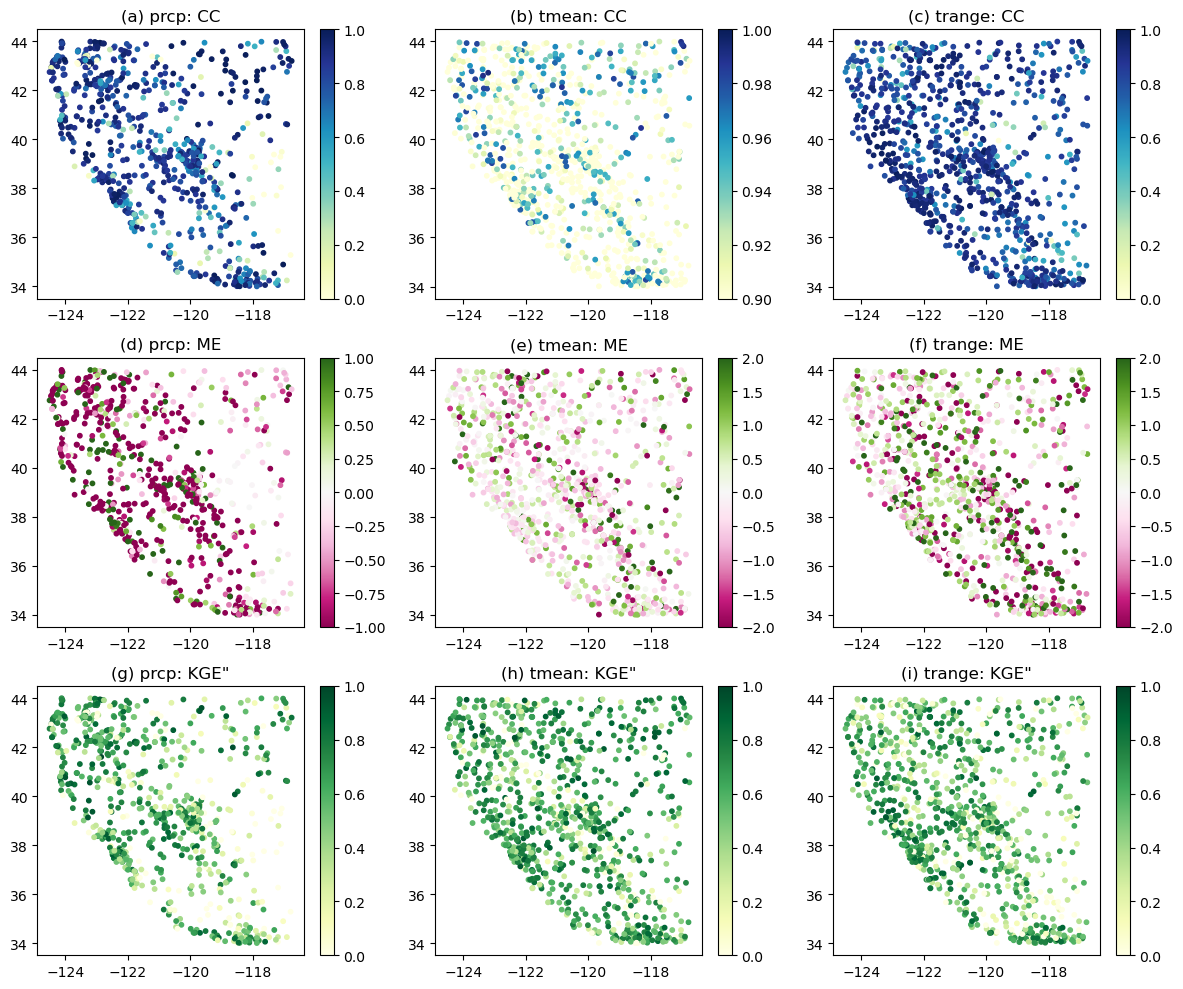

In [3]:

metnames = ['CC', 'ME', 'KGE_T2021']
varnames = ['prcp_boxcox_metric', 'tmean_metric', 'trange_metric']
stn_lat = ds_stn.lat.values
stn_lon = ds_stn.lon.values

titles = [ ['(a) prcp: CC', '(b) tmean: CC', '(c) trange: CC'], 
           ['(d) prcp: ME', '(e) tmean: ME', '(f) trange: ME'], 
           ['(g) prcp: KGE"', '(h) tmean: KGE"', '(i) trange: KGE"'] ]
 

cmaps = ['YlGnBu', 'PiYG', 'YlGn']
minmax = [ [ [0, 1], [0.9, 1], [0, 1] ], 
           [ [-1, 1], [-2, 2], [-2, 2] ], 
           [ [0, 1], [0, 1], [0, 1] ] ]
            

fig, axs = plt.subplots(len(metnames), len(varnames), figsize=[12, 10])

for i in range(len(metnames)):
    for j in range(len(varnames)):
        dij = ds_cv[varnames[j]].sel(met=metnames[i]).values
        axij = axs[i,j]
        p = axij.scatter(stn_lon, stn_lat, 10, dij, vmin=minmax[i][j][0], vmax=minmax[i][j][1], cmap=cmaps[i])
        plt.colorbar(p, ax=axij)
        axij.set_title(titles[i][j])

plt.tight_layout()
plt.show()